In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("../data/M5_list_groups-1.xlsx",
                    header=[0,1], 
                   index_col=[0])

In [4]:
data = data.reset_index(drop=True)

In [5]:
data = data.dropna(axis=1, how='all')

In [6]:
data

GROUP 1                                                GROUP 2  \
            TYPE     NAME        Source of identification          TYPE   
0        Protein     EMX2                    Antoine pres       Protein   
1        Protein   CTNNB1                    Antoine pres       Protein   
2        Protein     TENA                    Antoine pres       Protein   
3      MasterReg     ZIC1                   PMID:26814967       Protein   
4      MasterReg     ZIC4                   PMID:26814967     MasterReg   
5      MasterReg     NKD1                   PMID:26814967     MasterReg   
6      MasterReg     NKD2                   PMID:26814967     MasterReg   
7      MasterReg     LET7           PMID:26814967 (miRNA)     MasterReg   
8   GeneMutation   CTNNB1                   PMID:22832583  GeneMutation   
9   GeneMutation    DDX3X                   PMID:22832583  GeneMutation   
10  GeneMutation   CTNNB1                   PMID:22820256  GeneMutation   
11  GeneMutation    DDX3X                   PMID:22820256  GeneMutation   
12  GeneMutation     TP53                   PMID:22820256  GeneMutation   
13  GeneMutation  SMARCA4                   PMID:22820256  GeneMutation   
14  GeneMutation   CSNK2B                   PMID:22820256  GeneMutation   
15            TF      MAF           PMID:26814967 (FigS7)  GeneMutation   
16            TF     LHX2           PMID:26814967 (FigS7)            TF   
17            TF     EMX2           PMID:26814967 (FigS7)            TF   
18            TF     LEF1           PMID:26814967 (FigS7)            TF   
19            TF     PAX3           PMID:26814967 (FigS7)            TF   
20            TF  ONECUT2           PMID:26814967 (FigS7)            TF   
21            TF    RUNX2           PMID:26814967 (FigS7)            TF   
22            TF     MSX2           PMID:26814967 (FigS7)            TF   
23            TF    HOXDB  PMID:26814967 (FigS7) (cluster            TF   
24            TF    DMRT2           PMID:26814967 (FigS6)            TF   
25            TF     LEF1           PMID:26814967 (FigS6)            TF   
26            TF    RUNX2           PMID:26814967 (FigS6)            TF   
27            TF  HOXDB13           PMID:26814967 (FigS6)            TF   
28            TF     MSX2           PMID:26814967 (FigS6)            TF   
29            TF      MAF           PMID:26814967 (FigS6)            TF   
30           NaN      NaN                             NaN            TF   
31           NaN      NaN                             NaN            TF   
32           NaN      NaN                             NaN            TF   
33           NaN      NaN                             NaN            TF   
34           NaN      NaN                             NaN            TF   
35           NaN      NaN                             NaN           NaN   
36           NaN      NaN                             NaN           NaN   
37           NaN      NaN                             NaN           NaN   
38           NaN      NaN                             NaN           NaN   
39           NaN      NaN                             NaN           NaN   
40           NaN      NaN                             NaN           NaN   
41           NaN      NaN                             NaN           NaN   
42           NaN      NaN                             NaN           NaN   
43           NaN      NaN                             NaN           NaN   
44           NaN      NaN                             NaN           NaN   
45           NaN      NaN                             NaN           NaN   
46           NaN      NaN                             NaN           NaN   

                                               GROUP 3           \
      NAME Source of identification               TYPE     NAME   
0    ATOH1             Antoine pres            Protein    GBRA5   
1    PDLI3             Antoine pres            Protein    IMPG2   
2     YAP1               Grp2/SILAC            Protein    ANPRC  

In [7]:
data_type = pd.concat([data["GROUP 1"], data["GROUP 2"], data["GROUP 3"], data["GROUP 4"]]).dropna().reset_index(drop=True)

In [8]:
data_type = data_type.drop(columns=["Source of identification"])

In [9]:
data_type.to_csv("../data/antoine_gene_type.csv", index=False)

In [10]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [11]:
from venny4py.venny4py import *

In [12]:
set1 = data['GROUP 1']['NAME'].dropna()
set2 = data['GROUP 2']['NAME'].dropna()
set3 = data['GROUP 3']['NAME'].dropna()
set4 = data['GROUP 4']['NAME'].dropna()

In [13]:
set1

0        EMX2
1      CTNNB1
2        TENA
3        ZIC1
4        ZIC4
5        NKD1
6        NKD2
7        LET7
8      CTNNB1
9       DDX3X
10     CTNNB1
11      DDX3X
12       TP53
13    SMARCA4
14     CSNK2B
15        MAF
16       LHX2
17       EMX2
18       LEF1
19       PAX3
20    ONECUT2
21      RUNX2
22       MSX2
23      HOXDB
24      DMRT2
25       LEF1
26      RUNX2
27    HOXDB13
28       MSX2
29        MAF
Name: NAME, dtype: object

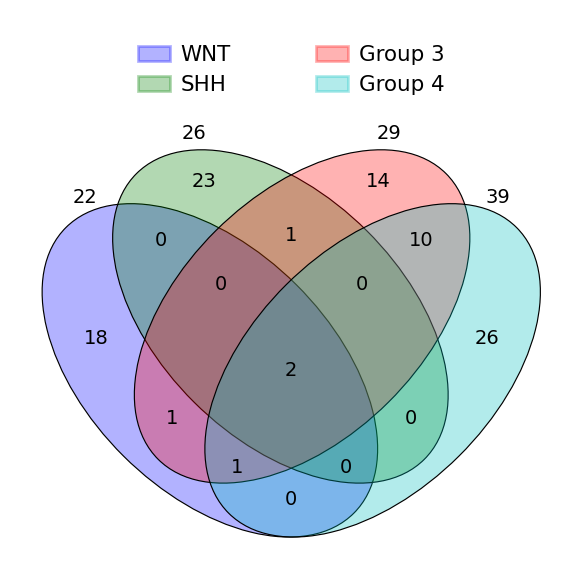

In [15]:
sets = {
    'WNT': set(set1),
    'SHH': set(set2),
    'Group 3': set(set3),
    'Group 4': set(set4)
}

venny4py(sets=sets, out='../Figures', name="antoine_data")

In [16]:
unique = get_unique(get_shared(sets))

In [17]:
sub_data = pd.DataFrame.from_dict(unique, orient='index')
sub_data = sub_data.transpose()

In [18]:
sub_data = sub_data.dropna(axis=1, how='all')

In [19]:
sub_data.fillna("", inplace=True)

In [20]:
sub_data.reset_index(drop=True, inplace=True)

In [21]:
sub_data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,MAF,PBX1,CRX,SIX2,SMARCA4,TGFBR1,KDM1A,LHX2,ZIC1
1,PAX3,PTCH1,SMAD9,STAT5A,,,KDM7A,,ZIC4
2,TP53,PDLI3,IRX8,CUX2,,,CHD7,,
3,DDX3X,YAP1,RARX2,EN2,,,KDM6A,,
4,TENA,SOX2,GABRA5,OTX2,,,EZH2,,
5,HOXDB13,POU3F3,ATP10A,TBR1,,,KDM5B,,
6,ONECUT2,NHLH1,LHX9,AKT,,,KDM5A,,
7,NKD2,PCNT,LIN28B,SNCAIP,,,KDM3A,,
8,CSNK2B,SMO,MYC,UNC5D,,,KDM4C,,
9,NKD1,GLI2,GBRA5,UNCX,,,ZMYM3,,


In [22]:
sub_data.to_csv("../data/antoine_discrete_data.csv", index=False)

In [23]:
data_2 = pd.read_excel("../data/41586_2016_BFnature16546_MOESM106_ESM.xlsx")

In [24]:
data_2

,peakid,tad,enhancer_cluster,gene,name,correlation,pvalue,correlationRank,qvalue,differentialExpressionStatus,SEid,SEChrom,SEStart,SEEnd,SEClass,foundInCancerGeneCensus,DrugInteraction,signatureGene
0,chr1:100025216-100027133,chr1:99627412-100227412,Group3,ENSG00000099260.6,PALMD,0.491538,0.013531,1,0.046907,Group3,NaN,NaN,NaN,NaN,NaN,False,False,True
1,chr1:100108331-100126161,chr1:99627412-100227412,Group3,ENSG00000099260.6,PALMD,0.860769,0.000002,1,0.000109,Group3,NaN,NaN,NaN,NaN,NaN,False,False,True
2,chr1:100628424-100634150,chr1:100227412-101387412,Group3,ENSG00000122477.8,LRRC39,0.603077,0.001750,1,0.011666,Group3,NaN,NaN,NaN,NaN,NaN,False,False,False
3,chr1:100820812-100829281,chr1:100227412-101387412,WNT,ENSG00000079335.13,CDC14A,0.681538,0.000254,1,0.002985,WNT,NaN,NaN,NaN,NaN,NaN,False,False,False
4,chr1:100928188-100937963,chr1:100227412-101387412,Group3,ENSG00000181656.6,GPR88,0.811538,0.000003,1,0.000115,none,NaN,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10205,chrX:9852886-9876746,chrX:8720000-10120000,WNT-SHH,ENSG00000146950.8,SHROOM2,0.822308,0.000002,1,0.000109,SHH,1_shh_809_lociStitched,chrX,9844210.0,9918319.0,SHH,False,False,False
10206,chrX:9876982-9883251,chrX:8720000-10120000,SHH,ENSG00000146950.8,SHROOM2,0.719231,0.000079,1,0.001285,SHH,1_shh_809_lociStitched,chrX,9844210.0,9918319.0,SHH,False,False,False
10207,chrX:9889555-9918319,chrX:8720000-10120000,WNT-SHH,ENSG00000146950.8,SHROOM2,0.845385,0.000002,1,0.000109,SHH,1_shh_809_lociStitched,chrX,9844210.0,9918319.0,SHH,False,False,False
10208,chrX:99971445-99981466,chrX:98553344-100073344,Group4,ENSG00000102362.11,SYTL4,0.883846,0.000002,1,0.000109,Group3,NaN,NaN,NaN,NaN,NaN,False,False,False


In [25]:
data_2[data_2["SEid"] == "1_group3_438_lociStitched"]

,peakid,tad,enhancer_cluster,gene,name,correlation,pvalue,correlationRank,qvalue,differentialExpressionStatus,SEid,SEChrom,SEStart,SEEnd,SEClass,foundInCancerGeneCensus,DrugInteraction,signatureGene
8353,chr7:135394953-135415062,chr7:134949460-136829460,Group3-Group4,ENSG00000243317.3,C7orf73,0.561538,0.004046,2,0.020839,Group3,1_group3_438_lociStitched,chr7,135381070.0,135495145.0,GROUP3,False,False,False
8354,chr7:135394953-135415062,chr7:134949460-136829460,Group3-Group4,ENSG00000164707.11,SLC13A4,0.583077,0.002654,1,0.015527,Group3,1_group3_438_lociStitched,chr7,135381070.0,135495145.0,GROUP3,False,False,False
8355,chr7:135449386-135472387,chr7:134949460-136829460,Group3-Group4,ENSG00000155561.10,NUP205,0.668462,0.000364,2,0.003860,Group3,1_group3_438_lociStitched,chr7,135381070.0,135495145.0,GROUP3,False,False,False
8356,chr7:135449386-135472387,chr7:134949460-136829460,Group3-Group4,ENSG00000243317.3,C7orf73,0.713846,0.000095,1,0.001457,Group3,1_group3_438_lociStitched,chr7,135381070.0,135495145.0,GROUP3,False,False,False
8357,chr7:135472916-135488460,chr7:134949460-136829460,Group3,ENSG00000243317.3,C7orf73,0.616154,0.001314,2,0.009514,Group3,1_group3_438_lociStitched,chr7,135381070.0,135495145.0,GROUP3,False,False,False
8358,chr7:135472916-135488460,chr7:134949460-136829460,Group3,ENSG00000164707.11,SLC13A4,0.647692,0.000624,1,0.005620,Group3,1_group3_438_lociStitched,chr7,135381070.0,135495145.0,GROUP3,False,False,False


In [26]:
data_2[data_2["name"] == "AAED1"]

,peakid,tad,enhancer_cluster,gene,name,correlation,pvalue,correlationRank,qvalue,differentialExpressionStatus,SEid,SEChrom,SEStart,SEEnd,SEClass,foundInCancerGeneCensus,DrugInteraction,signatureGene
9911,chr9:99101064-99116620,chr9:99080179-99600179,SHH,ENSG00000158122.7,AAED1,0.546154,0.005383,2,0.025331,WNT-SHH,NaN,NaN,NaN,NaN,NaN,False,False,False


In [27]:
data_2[data_2["name"] == "A4GALT"]

,peakid,tad,enhancer_cluster,gene,name,correlation,pvalue,correlationRank,qvalue,differentialExpressionStatus,SEid,SEChrom,SEStart,SEEnd,SEClass,foundInCancerGeneCensus,DrugInteraction,signatureGene
5771,chr22:43076079-43099038,chr22:43030056-43510056,SHH,ENSG00000128274.11,A4GALT,0.578462,0.002911,1,0.016538,SHH,1_shh_168_lociStitched,chr22,43039178.0,43211059.0,SHH,False,False,False
5773,chr22:43110271-43121205,chr22:43030056-43510056,SHH,ENSG00000128274.11,A4GALT,0.588462,0.002378,1,0.014354,SHH,1_shh_168_lociStitched,chr22,43039178.0,43211059.0,SHH,False,False,False
5775,chr22:43142171-43147423,chr22:43030056-43510056,WNT-SHH,ENSG00000128274.11,A4GALT,0.530769,0.007077,1,0.030394,SHH,1_shh_168_lociStitched,chr22,43039178.0,43211059.0,SHH,False,False,False
5777,chr22:43163616-43171672,chr22:43030056-43510056,SHH,ENSG00000128274.11,A4GALT,0.664615,0.000404,2,0.004150,SHH,1_shh_168_lociStitched,chr22,43039178.0,43211059.0,SHH,False,False,False
5779,chr22:43180110-43194339,chr22:43030056-43510056,SHH,ENSG00000128274.11,A4GALT,0.523846,0.007975,1,0.032943,SHH,1_shh_168_lociStitched,chr22,43039178.0,43211059.0,SHH,False,False,False
5781,chr22:43194674-43204052,chr22:43030056-43510056,WNT-SHH,ENSG00000128274.11,A4GALT,0.676154,0.000295,1,0.003342,SHH,1_shh_168_lociStitched,chr22,43039178.0,43211059.0,SHH,False,False,False
5782,chr22:43275000-43282868,chr22:43030056-43510056,WNT-SHH,ENSG00000128274.11,A4GALT,0.519231,0.008625,1,0.034741,SHH,1_shh_1103_lociStitched,chr22,43251709.0,43308033.0,SHH,False,False,False
5783,chr22:43435343-43442285,chr22:43030056-43510056,WNT-SHH,ENSG00000128274.11,A4GALT,0.634615,0.000858,1,0.007022,SHH,NaN,NaN,NaN,NaN,NaN,False,False,False


In [28]:
data_2 = data_2.drop(columns=["peakid", "tad", "SEChrom", "SEStart", "SEEnd", "SEClass"])

<Axes: xlabel='correlation', ylabel='pvalue'>

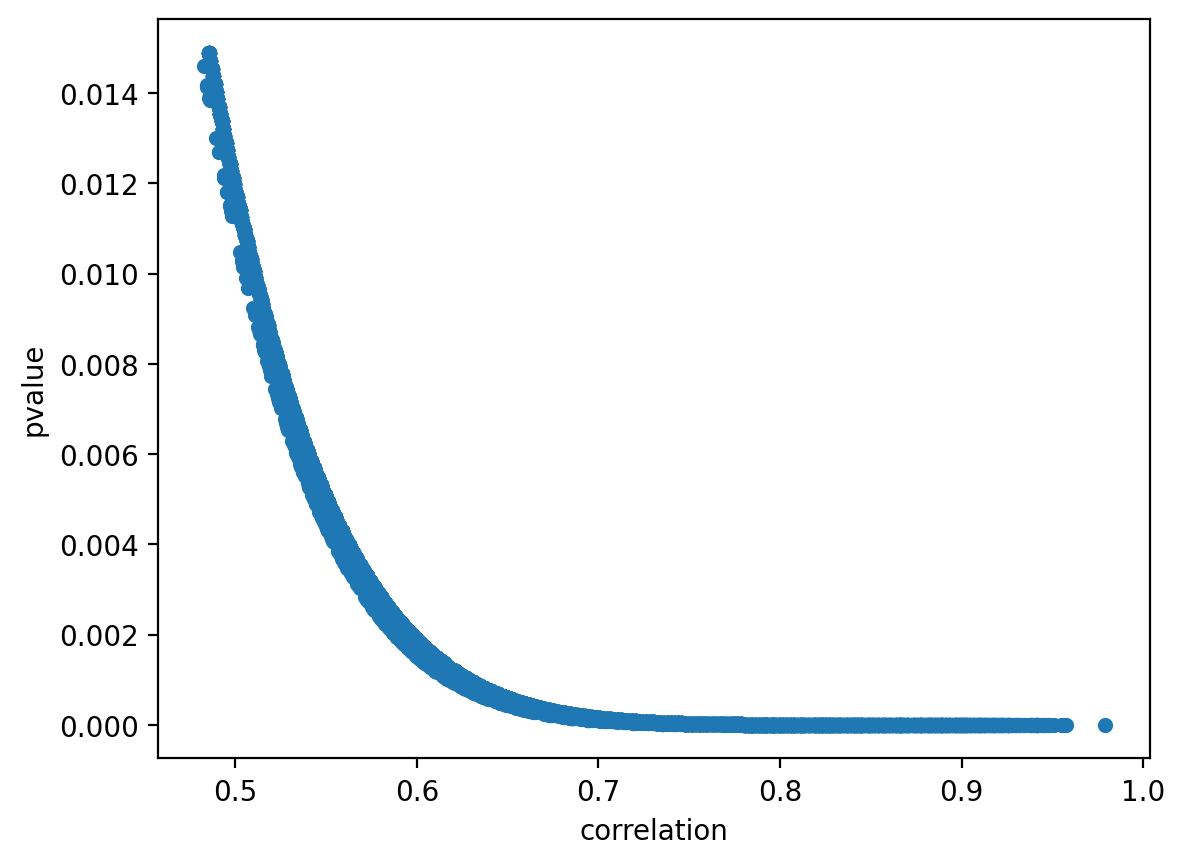

In [29]:
data_2.plot("correlation", "pvalue", kind="scatter")

In [30]:
def list_sum(series):
    if len(series) == 1 and "-" in series:
        return series
    elif len(series) > 1:
        for elem in series:
            if "-" in elem:
                return(elem)
        return "-".join(set(series))
    return series

aggregate_function = {
    "enhancer_cluster": list_sum
}

In [31]:
data2_grouped = data_2.groupby("name").aggregate(aggregate_function).reset_index()

In [32]:
data2_grouped # To produce Venn diagram from this

,name,enhancer_cluster
0,A4GALT,WNT-SHH
1,AACS,Group3-Group4
2,AAED1,SHH
3,AASS,WNT-SHH
4,ABCB4,SHH
...,...,...
3452,ZNRF3,WNT-SHH
3453,ZSCAN12,Group4
3454,ZWINT,SHH
3455,ZYG11B,Group4


In [33]:
# Creating a new dataframe with groups as columns
group_columns = ['WNT', 'SHH', 'Group3', 'Group4']
data_2_pivot = pd.DataFrame(columns=group_columns)

# Populating the new dataframe with genes
for group in group_columns:
    data_2_pivot[group] = data2_grouped.loc[data2_grouped['enhancer_cluster'].str.contains(group), 'name'].reset_index(drop=True)

# Adjusting columns to match the desired names
data_2_pivot.columns = ['WNT', 'SHH', 'Group 3', 'Group 4']

# Filling empty cells with NaN
data_2_pivot = data_2_pivot.apply(lambda x: x.replace('', np.nan))

In [34]:
data_2_pivot

,WNT,SHH,Group 3,Group 4
0,A4GALT,A4GALT,AACS,AACS
1,AASS,AAED1,ABCB8,ABCB8
2,ABCB9,AASS,ABCC8,ABCC8
3,ABCD2,ABCB4,ABCG4,ABCC9
4,ABLIM1,ABCB9,ABL2,ABCG4
...,...,...,...,...
1426,ZNF804B,NaN,ZBTB8B,NaN
1427,ZNF829,NaN,ZC3H6,NaN
1428,ZNRF2,NaN,ZCCHC14,NaN
1429,ZNRF3,NaN,ZCCHC9,NaN


In [35]:
set1_2 = data_2_pivot['WNT'].dropna()
set2_2 = data_2_pivot['SHH'].dropna()
set3_2 = data_2_pivot['Group 3'].dropna()
set4_2 = data_2_pivot['Group 4'].dropna()

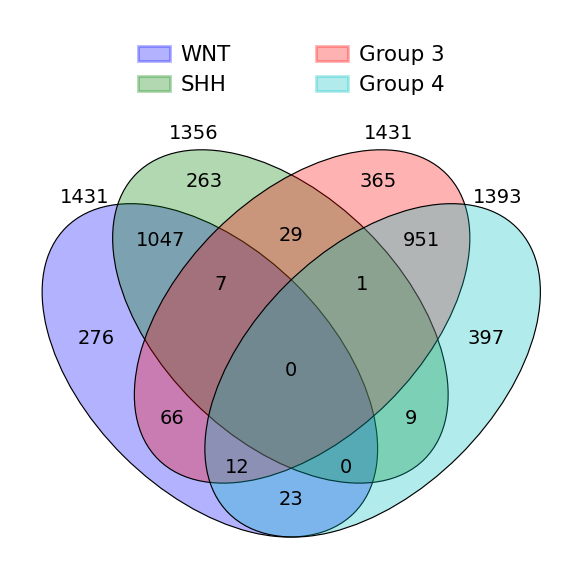

In [37]:
sets_2 = {
    'WNT': set(set1_2),
    'SHH': set(set2_2),
    'Group 3': set(set3_2),
    'Group 4': set(set4_2)
}

venny4py(sets=sets_2, out='../Figures', name="table3_data")

In [38]:
unique_2 = get_unique(get_shared(sets_2))

In [39]:
sub_data_2 = pd.DataFrame.from_dict(unique_2, orient='index')
sub_data_2 = sub_data_2.transpose()

In [40]:
sub_data_2 = sub_data_2.dropna(axis=1, how='all')

In [41]:
sub_data_2.fillna("", inplace=True)

In [42]:
sub_data_2.reset_index(drop=True, inplace=True)

In [43]:
sub_data_2

,WNT,SHH,Group 3,Group 4,WNT and SHH,WNT and Group 3,WNT and Group 4,SHH and Group 3,SHH and Group 4,Group 3 and Group 4,WNT and SHH and Group 3,WNT and Group 3 and Group 4,SHH and Group 3 and Group 4
0,TMED2,DOCK11,ELL2,PCDHB5,MCF2L,GAD1,ZNF483,EYA1,C7orf13,CHCHD6,PCCA,TAC1,RGMB
1,TTC6,CTDSP2,CNOT2,TMEM158,DCDC1,AC092675.3,OBFC1,DGKI,TSHZ1,RNF144A,LURAP1L,PEX5L,
2,PDHB,PGM1,LYPLAL1,SNX11,ZNF233,PPHLN1,MYH15,NTS,SLC22A15,SLC6A9,ROR1,NDUFAF5,
3,STK3,CHRNA5,C7orf55-LUC7L2,BDNF,PRDM2,BET1,TSPAN9,TSPAN12,PDS5B,CELF6,LPPR1,ELSPBP1,
4,LRRTM1,PCYOX1L,MTRR,GGACT,SCARF2,OSBPL6,AMHR2,FAM155B,NHLH2,ARHGEF4,TGDS,MAGEC3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,,,,,TRHDE,,,,,,,,
1043,,,,,SORCS2,,,,,,,,
1044,,,,,HS6ST1,,,,,,,,
1045,,,,,TH,,,,,,,,


# Part 3
### Re-do the analysis taking into account not the "enhancer_cluster" but the "differentialExpressionStatus".
### This discriminant takes into account not only the correlation between the enhancer peaks and the amount of rna transcriptome, but also the fact that the peak id region falls in the tad (topologically associated domain). In order to do so, I have to filter out all those genes which value for differentialExpressionStatus is None.

In [44]:
data_3 = pd.read_excel("../data/41586_2016_BFnature16546_MOESM106_ESM.xlsx")

In [45]:
data_3 = data_3.drop(columns=["peakid", "tad", "SEChrom", "SEStart", "SEEnd", "SEClass"])

In [46]:
data_3 = data_3[data_3["differentialExpressionStatus"] != "none"]

In [47]:
data_3

,enhancer_cluster,gene,name,correlation,pvalue,correlationRank,qvalue,differentialExpressionStatus,SEid,foundInCancerGeneCensus,DrugInteraction,signatureGene
0,Group3,ENSG00000099260.6,PALMD,0.491538,0.013531,1,0.046907,Group3,NaN,False,False,True
1,Group3,ENSG00000099260.6,PALMD,0.860769,0.000002,1,0.000109,Group3,NaN,False,False,True
2,Group3,ENSG00000122477.8,LRRC39,0.603077,0.001750,1,0.011666,Group3,NaN,False,False,False
3,WNT,ENSG00000079335.13,CDC14A,0.681538,0.000254,1,0.002985,WNT,NaN,False,False,False
5,Group3,ENSG00000122477.8,LRRC39,0.668462,0.000364,1,0.003860,Group3,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10205,WNT-SHH,ENSG00000146950.8,SHROOM2,0.822308,0.000002,1,0.000109,SHH,1_shh_809_lociStitched,False,False,False
10206,SHH,ENSG00000146950.8,SHROOM2,0.719231,0.000079,1,0.001285,SHH,1_shh_809_lociStitched,False,False,False
10207,WNT-SHH,ENSG00000146950.8,SHROOM2,0.845385,0.000002,1,0.000109,SHH,1_shh_809_lociStitched,False,False,False
10208,Group4,ENSG00000102362.11,SYTL4,0.883846,0.000002,1,0.000109,Group3,NaN,False,False,False


In [48]:
def list_sum(series):
    if len(series) == 1 and "-" in series:
        return series
    elif len(series) > 1:
        for elem in series:
            if "-" in elem:
                return(elem)
        return "".join(set(series))
    return series

def seid(series):
    for elem in series:
        if elem:
            return elem
    return None

aggregate_function = {
    "differentialExpressionStatus": list_sum,
    "correlation": "max",
    "pvalue": "min",
}

In [49]:
data3_grouped = data_3.groupby("name").aggregate(aggregate_function).reset_index()

In [50]:
data3_grouped.dropna(inplace=True)

In [51]:
data3_grouped.reset_index(drop=True)

,name,differentialExpressionStatus,correlation,pvalue
0,A4GALT,SHH,0.676154,0.000295
1,AACS,Group4,0.740000,0.000038
2,AAED1,WNT-SHH,0.546154,0.005383
3,AASS,SHH,0.640769,0.000740
4,ABCB4,SHH,0.524615,0.007870
...,...,...,...,...
2872,ZNF93,SHH,0.680000,0.000265
2873,ZNRF2,WNT,0.739231,0.000039
2874,ZNRF3,WNT,0.781538,0.000007
2875,ZSCAN12,Group3-Group4,0.577692,0.002956


In [52]:
df = pd.DataFrame(data3_grouped)

# Creating a new dataframe with groups as columns and multi-level column index
group_columns = ['WNT', 'SHH', 'Group3', 'Group4']
multi_index_columns = pd.MultiIndex.from_product([group_columns, ['name', 'correlation']], names=['Group', 'Attribute'])
multi_df = pd.DataFrame(columns=multi_index_columns)

# Populating the new dataframe with genes and correlations
for group in group_columns:
    temp_df = df[df['differentialExpressionStatus'].str.contains(group)][['name', 'correlation']]
    for attribute in ['name', 'correlation']:
        multi_df[(group, attribute)] = temp_df[attribute].reset_index(drop=True)

In [53]:
multi_df

Group             WNT                 SHH                  Group3              \
Attribute        name correlation    name correlation        name correlation   
0               AAED1    0.546154  A4GALT    0.676154       ABCB8    0.574615   
1               ABCC8    0.722308   AAED1    0.546154       ABCG4    0.739231   
2               ABCD2    0.750769    AASS    0.640769        ABT1    0.560769   
3               ABHD4    0.527692   ABCB4    0.524615  AC016559.1    0.736923   
4          AC007405.2    0.781538   ABCB9    0.717692  AC026703.1    0.889231   
..                ...         ...     ...         ...         ...         ...   
855            ZNF503    0.502308     NaN         NaN         NaN         NaN   
856            ZNF576    0.486154     NaN         NaN         NaN         NaN   
857           ZNF804B    0.676154     NaN         NaN         NaN         NaN   
858             ZNRF2    0.739231     NaN         NaN         NaN         NaN   
859             ZNRF3    0.781538     NaN         NaN         NaN         NaN   

Group       Group4              
Attribute     name correlation  
0             AACS    0.740000  
1            ABCC8    0.722308  
2            ABCC9    0.779231  
3          ABHD17C    0.583077  
4            ABHD4    0.527692  
..             ...         ...  
855         UBE2L6    0.775385  
856          UNC5D    0.938462  
857           UNCX    0.598462  
858          USP25    0.552308  
859          USP32    0.617692  

[860 rows x 8 columns]

In [54]:
multi_df.to_csv("../data/gene_per_subgroup_correlation.csv")

In [55]:
set1_3 = multi_df['WNT']["name"].dropna()
set2_3 = multi_df['SHH']["name"].dropna()
set3_3 = multi_df['Group3']["name"].dropna()
set4_3 = multi_df['Group4']["name"].dropna()

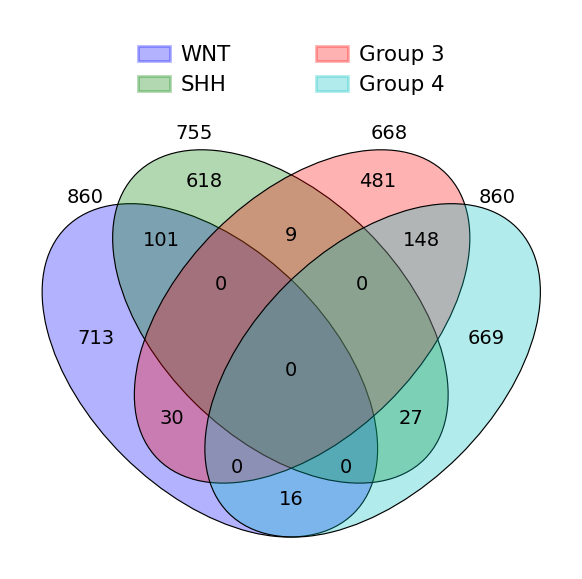

In [56]:
sets_3 = {
    'WNT': set(set1_3),
    'SHH': set(set2_3),
    'Group 3': set(set3_3),
    'Group 4': set(set4_3)
}

venny4py(sets=sets_3, out='../Figures', name="table3_2_data")

In [57]:
unique_3 = get_unique(get_shared(sets_3))

In [58]:
sub_data_3 = pd.DataFrame.from_dict(unique_3, orient='index')
sub_data_3 = sub_data_3.transpose()

In [59]:
sub_data_3 = sub_data_3.dropna(axis=1, how='all')

In [60]:
sub_data_3.fillna("", inplace=True)

In [61]:
sub_data_3.reset_index(drop=True, inplace=True)

In [94]:
sub_data_3

,WNT,SHH,Group 3,Group 4,WNT and SHH,WNT and Group 3,WNT and Group 4,SHH and Group 3,SHH and Group 4,Group 3 and Group 4
0,TMED2,DCDC1,SLC6A9,MCF2L,MYO7A,CALR,SLC24A2,CCNC,UBE2L6,SAYSD1
1,CELF6,C12orf29,LNP1,KIAA1549,NTN1,TMEM64,PCSK1N,NSMCE2,TBC1D2B,MFSD11
2,AC092675.3,SPATA2L,SLC8A1,RNF144A,HSCB,BET1,ABCC8,CDCA7,PSD3,PTPRO
3,CBLN2,CLIP2,SLC35F3,SLC31A1,EPHB4,CRADD,ADCYAP1R1,HDDC2,MARCKS,SLCO5A1
4,SCARF2,WDFY4,TGFB3,SCRN1,RHOBTB3,BSG,CLCN4,FBXO16,PAK3,LYRM2
...,...,...,...,...,...,...,...,...,...,...
708,TMEM51,,,,,,,,,
709,FOXF1,,,,,,,,,
710,PRRX1,,,,,,,,,
711,KLHL42,,,,,,,,,


In [96]:
sub_data_3.to_csv("../data/des_data.csv", index=False)

In [64]:
# Identify unique genes for each group
unique_genes = {}

for group in group_columns:
    all_other_groups = set(group_columns) - {group}
    unique_genes[group] = multi_df[(group, 'name')].dropna().tolist()
    for other_group in all_other_groups:
        unique_genes[group] = list(set(unique_genes[group]) - set(multi_df[(other_group, 'name')].dropna().tolist()))

# Creating a new dataframe for unique genes with their correlations
unique_genes_data = []
for group in unique_genes:
    for gene in unique_genes[group]:
        correlation = multi_df[(multi_df[(group, 'name')] == gene)][(group, 'correlation')].values[0]
        unique_genes_data.append((gene, group, correlation))

unique_genes_df = pd.DataFrame(unique_genes_data, columns=["name", "differentialExpressionStatus", "correlation"])

In [65]:
unique_genes_df

,name,differentialExpressionStatus,correlation
0,TMED2,WNT,0.555385
1,CELF6,WNT,0.693077
2,AC092675.3,WNT,0.827852
3,CBLN2,WNT,0.535385
4,SCARF2,WNT,0.531538
...,...,...,...
2476,KCNN1,Group4,0.892308
2477,EBF1,Group4,0.780000
2478,RP11-159G9.5,Group4,0.589231
2479,TMEM150C,Group4,0.816154


In [66]:
df = pd.DataFrame(unique_genes_df)

# Creating a new dataframe with groups as columns and multi-level column index
group_columns = ['WNT', 'SHH', 'Group3', 'Group4']
multi_index_columns_unique = pd.MultiIndex.from_product([group_columns, ['name', 'correlation']], names=['Group', 'Attribute'])
multi_df_unique = pd.DataFrame(columns=multi_index_columns_unique)

# Populating the new dataframe with genes and correlations
for group in group_columns:
    temp_df = df[df['differentialExpressionStatus'].str.contains(group)][['name', 'correlation']]
    for attribute in ['name', 'correlation']:
        multi_df_unique[(group, attribute)] = temp_df[attribute].reset_index(drop=True)

In [67]:
sorted_multi_df_WNT = multi_df_unique.sort_values(by=('WNT', 'correlation'), ascending=False,  na_position='last')['WNT'].reset_index()
sorted_multi_df_SHH = multi_df_unique.sort_values(by=('SHH', 'correlation'), ascending=False,  na_position='last')['SHH'].reset_index()
sorted_multi_df_g3 = multi_df_unique.sort_values(by=('Group3', 'correlation'), ascending=False,  na_position='last')['Group3'].reset_index()
sorted_multi_df_g4 = multi_df_unique.sort_values(by=('Group4', 'correlation'), ascending=False,  na_position='last')['Group4'].reset_index()

In [68]:
# Adding the "Group" level to each dataframe
sorted_multi_df_WNT.columns = pd.MultiIndex.from_product([['WNT'], sorted_multi_df_WNT.columns])
sorted_multi_df_SHH.columns = pd.MultiIndex.from_product([['SHH'], sorted_multi_df_SHH.columns])
sorted_multi_df_g3.columns = pd.MultiIndex.from_product([['Group3'], sorted_multi_df_g3.columns])
sorted_multi_df_g4.columns = pd.MultiIndex.from_product([['Group4'], sorted_multi_df_g4.columns])

# Concatenating the dataframes horizontally
sorted_multi_df = pd.concat([sorted_multi_df_WNT, sorted_multi_df_SHH, sorted_multi_df_g3, sorted_multi_df_g4], axis=1)

sorted_multi_df

WNT                        SHH                      Group3  \
Attribute index     name correlation index     name correlation  index   
0           351  GALNT14    0.940769   486    PLCH1    0.955385    397   
1           307    LRIG3    0.939231   354     MYCL    0.947692    237   
2           168     ZIC2    0.936923   616   DMRTA1    0.945385    111   
3           305     RAI2    0.929231   364    SATB2    0.930000     17   
4           660   APCDD1    0.928462   454  TCERG1L    0.925385    240   
..          ...      ...         ...   ...      ...         ...    ...   
708         144    PSAT1    0.487692   708      NaN         NaN    708   
709         608     FBN1    0.487692   709      NaN         NaN    709   
710         225   ZNF576    0.486154   710      NaN         NaN    710   
711          44     DKK4    0.485445   711      NaN         NaN    711   
712         386   GLT8D2    0.485385   712      NaN         NaN    712   

                              Group4                       
Attribute    name correlation  index     name correlation  
0           FSTL5    0.942308    333   FAM65B    0.979231  
1          PAPPA2    0.941538     33     SIX6    0.955351  
2           IMPG2    0.941538     15   SNCAIP    0.950769  
3           OR2W3    0.941335    623  SLC10A4    0.947692  
4          TRIM58    0.934615    586    CNPY1    0.945385  
..            ...         ...    ...      ...         ...  
708           NaN         NaN    708      NaN         NaN  
709           NaN         NaN    709      NaN         NaN  
710           NaN         NaN    710      NaN         NaN  
711           NaN         NaN    711      NaN         NaN  
712           NaN         NaN    712      NaN         NaN  

[713 rows x 12 columns]

In [69]:
sorted_multi_df = sorted_multi_df.drop(columns=[("WNT","index"), ("SHH","index"), ("Group3","index"), ("Group4","index")])
sorted_multi_df

WNT                  SHH              Group3              \
Attribute     name correlation     name correlation    name correlation   
0          GALNT14    0.940769    PLCH1    0.955385   FSTL5    0.942308   
1            LRIG3    0.939231     MYCL    0.947692  PAPPA2    0.941538   
2             ZIC2    0.936923   DMRTA1    0.945385   IMPG2    0.941538   
3             RAI2    0.929231    SATB2    0.930000   OR2W3    0.941335   
4           APCDD1    0.928462  TCERG1L    0.925385  TRIM58    0.934615   
..             ...         ...      ...         ...     ...         ...   
708          PSAT1    0.487692      NaN         NaN     NaN         NaN   
709           FBN1    0.487692      NaN         NaN     NaN         NaN   
710         ZNF576    0.486154      NaN         NaN     NaN         NaN   
711           DKK4    0.485445      NaN         NaN     NaN         NaN   
712         GLT8D2    0.485385      NaN         NaN     NaN         NaN   

            Group4              
Attribute     name correlation  
0           FAM65B    0.979231  
1             SIX6    0.955351  
2           SNCAIP    0.950769  
3          SLC10A4    0.947692  
4            CNPY1    0.945385  
..             ...         ...  
708            NaN         NaN  
709            NaN         NaN  
710            NaN         NaN  
711            NaN         NaN  
712            NaN         NaN  

[713 rows x 8 columns]

In [70]:
sorted_multi_df.to_csv("../data/gene_per_subgroup_correlation_sorted.csv")

# Plotting the data from third part

In [71]:
multi_df_plot = multi_df.copy()

In [72]:
# Flattening the multi-level columns
multi_df_plot.columns = ['_'.join(col).strip() for col in multi_df_plot.columns.values]

# Melting the dataframe
melted_df = multi_df_plot.melt(value_vars=["WNT_correlation", "SHH_correlation", "Group3_correlation", "Group4_correlation"],
                          id_vars=["WNT_name", "SHH_name", "Group3_name", "Group4_name"],
                          var_name="Group_Attribute",
                          value_name="Correlation")

# Splitting the 'Group_Attribute' column into 'Group' and 'Attribute'
melted_df[['Group', 'Attribute']] = melted_df['Group_Attribute'].str.split('_', expand=True)

# Preparing the data for seaborn
plot_data = []
for _, row in melted_df.iterrows():
    if row["Group"] == "WNT":
        gene_name = row["WNT_name"]
    elif row["Group"] == "SHH":
        gene_name = row["SHH_name"]
    elif row["Group"] == "Group3":
        gene_name = row["Group3_name"]
    elif row["Group"] == "Group4":
        gene_name = row["Group4_name"]
    
    plot_data.append((gene_name, row["Group"], row["Correlation"]))

plot_df = pd.DataFrame(plot_data, columns=["Gene", "Group", "Correlation"]).dropna()

# Plotting using seaborn
#plt.figure(figsize=(12, 6))
#sns.barplot(data=plot_df, x="Gene", y="Correlation", hue="Group")
#plt.xticks(rotation=90)
#plt.title("Gene Correlations Across Groups")
#plt.show()


In [73]:
plot_df

,Gene,Group,Correlation
0,AAED1,WNT,0.546154
1,ABCC8,WNT,0.722308
2,ABCD2,WNT,0.750769
3,ABHD4,WNT,0.527692
4,AC007405.2,WNT,0.781538
...,...,...,...
3435,UBE2L6,Group4,0.775385
3436,UNC5D,Group4,0.938462
3437,UNCX,Group4,0.598462
3438,USP25,Group4,0.552308


In [74]:
# Sorting the plot_df by correlation in descending order and selecting the top 30 genes
sorted_plot_df = plot_df.sort_values(by="Correlation", ascending=False).head(30)

In [75]:
sorted_plot_df

,Gene,Group,Correlation
2839,FAM65B,Group4,0.979231
848,ZFPM2,WNT,0.957692
2374,ZFPM2,Group3,0.957692
1357,PLCH1,SHH,0.955385
3286,SIX6,Group4,0.955351
3320,SNCAIP,Group4,0.950769
2865,FOXG1,Group4,0.947957
1940,FOXG1,Group3,0.947957
1262,MYCL,SHH,0.947692
3287,SLC10A4,Group4,0.947692


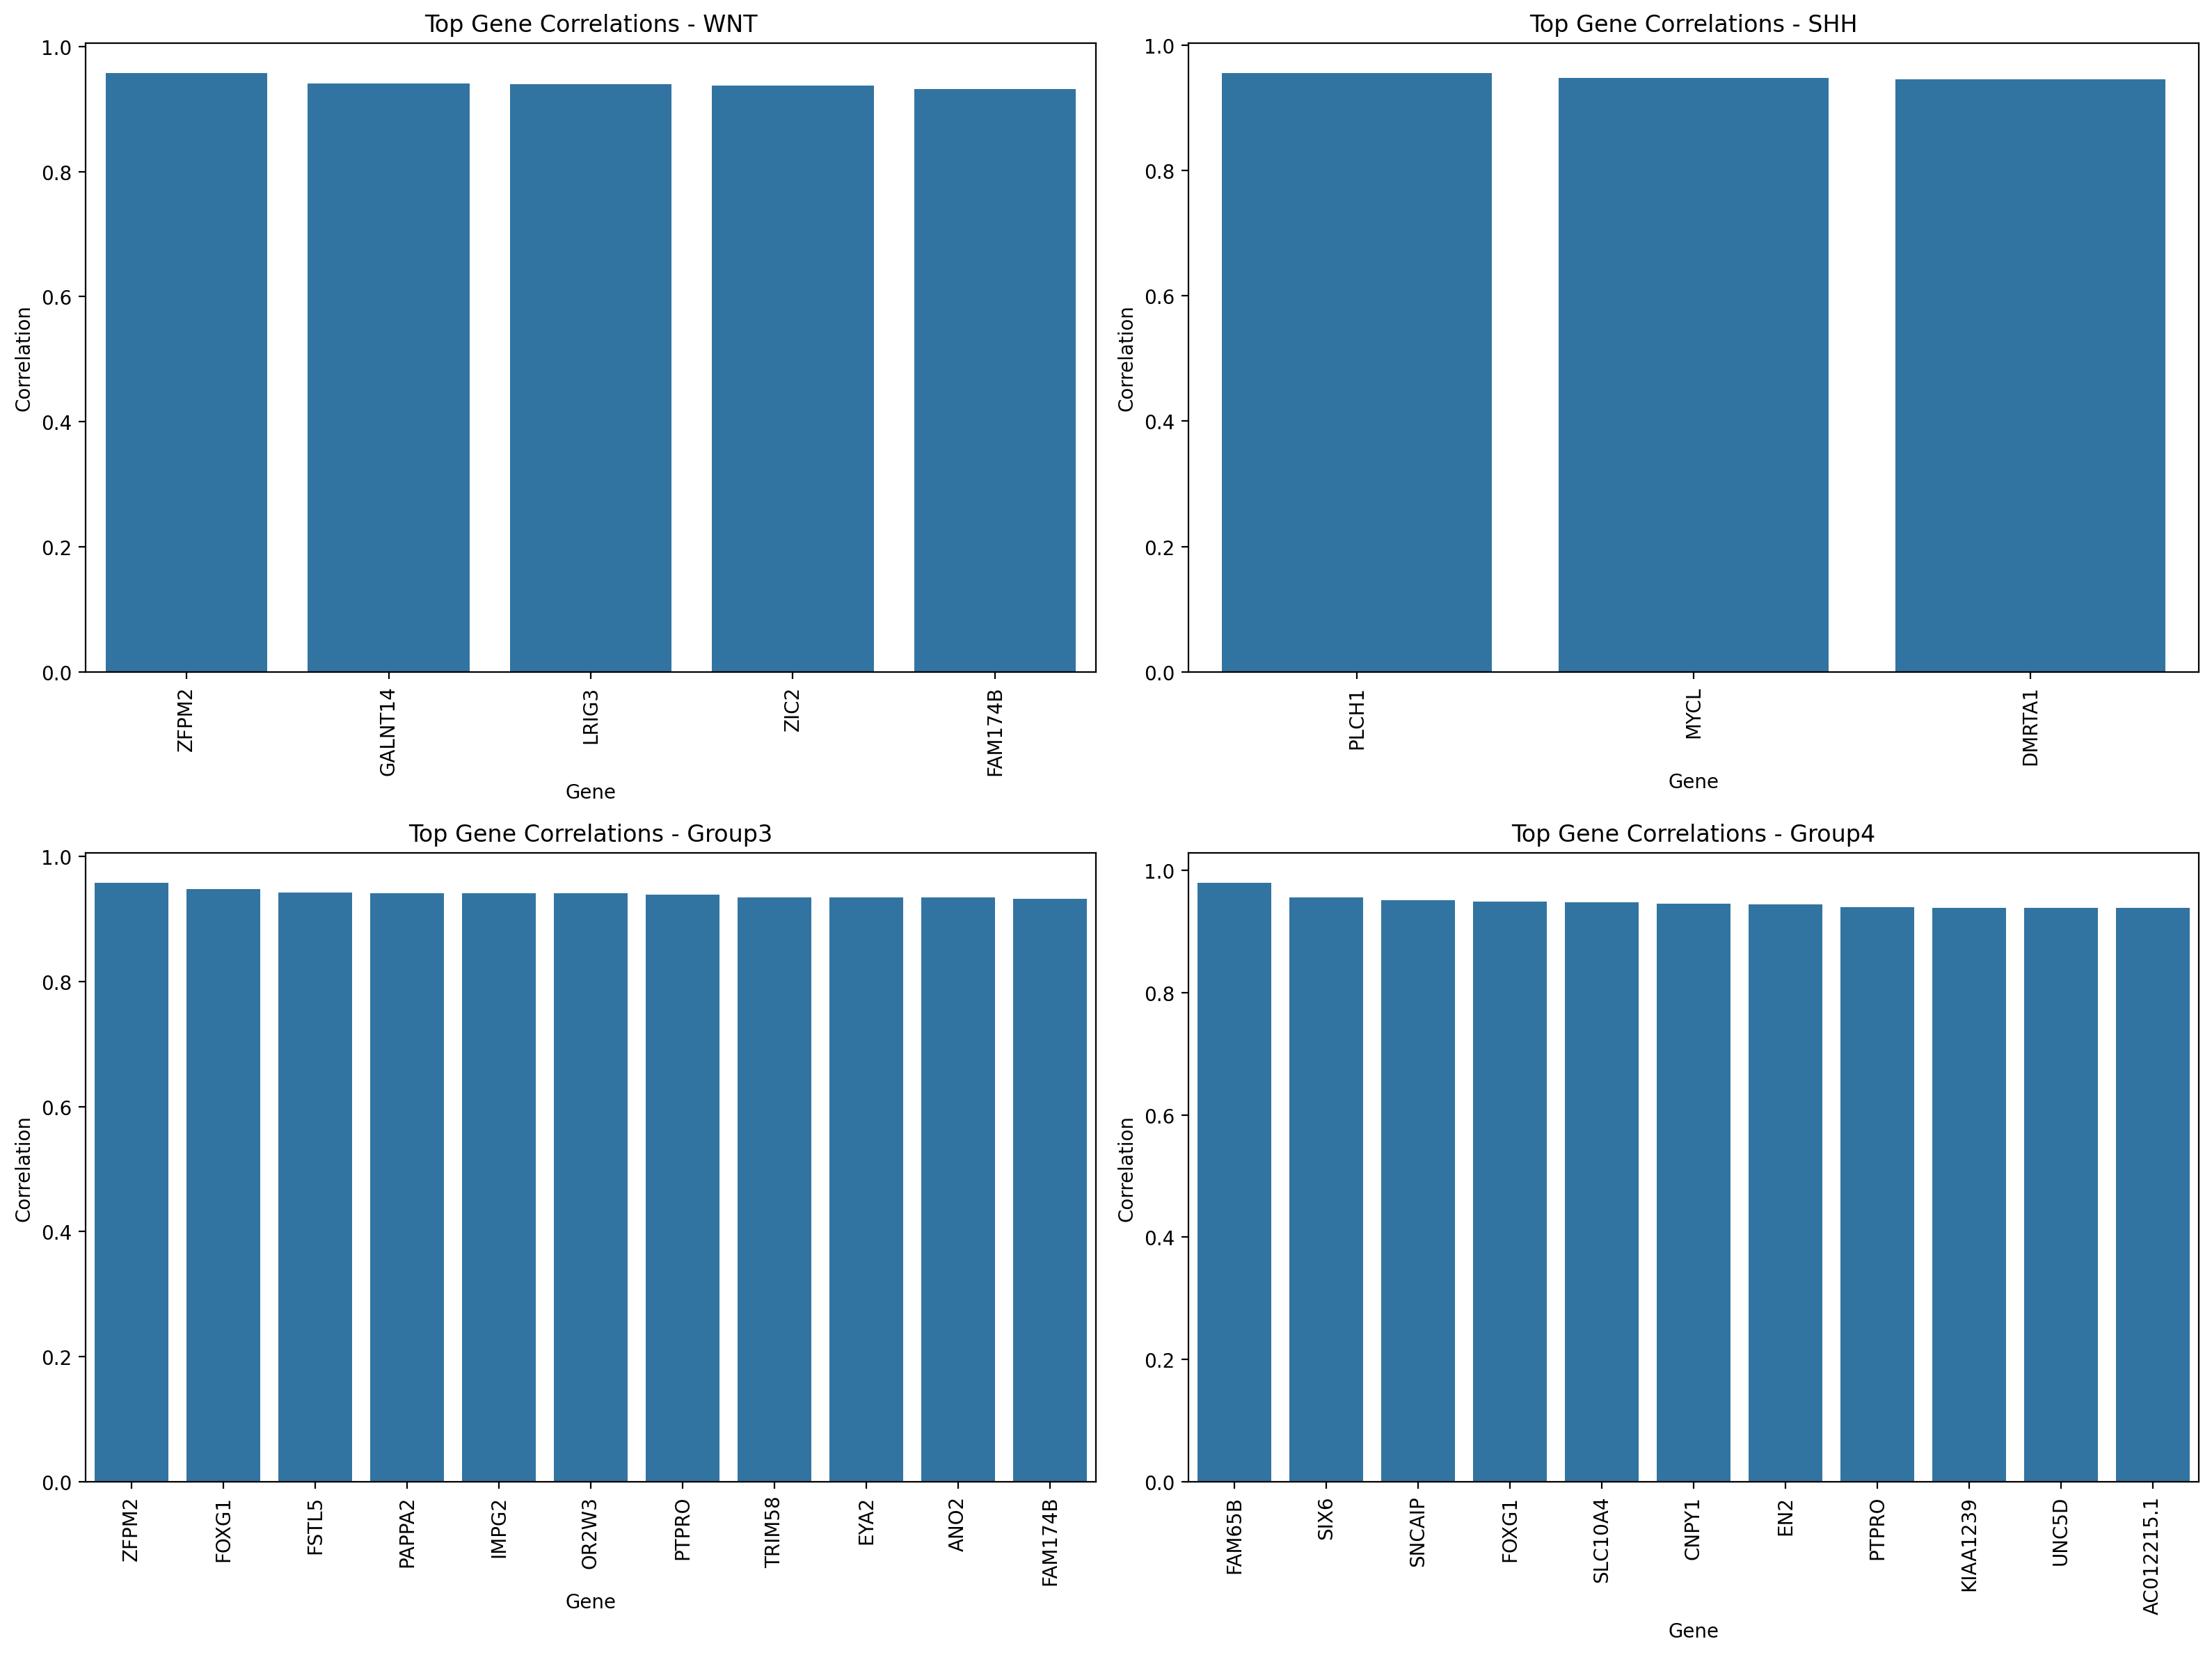

In [76]:
# Creating separate plots for each group
plt.figure(figsize=(16, 12))

group_list = ["WNT", "SHH", "Group3", "Group4"]
for i, group in enumerate(group_list, 1):
    plt.subplot(2, 2, i)
    group_data = sorted_plot_df[sorted_plot_df['Group'] == group]
    if not group_data.empty:
        sns.barplot(data=group_data, x="Gene", y="Correlation", dodge=False)
        plt.xticks(rotation=90)
        plt.title(f"Top Gene Correlations - {group}")

plt.tight_layout()
plt.show()

/tmp/ipykernel_26880/1855153311.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = plot_df.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


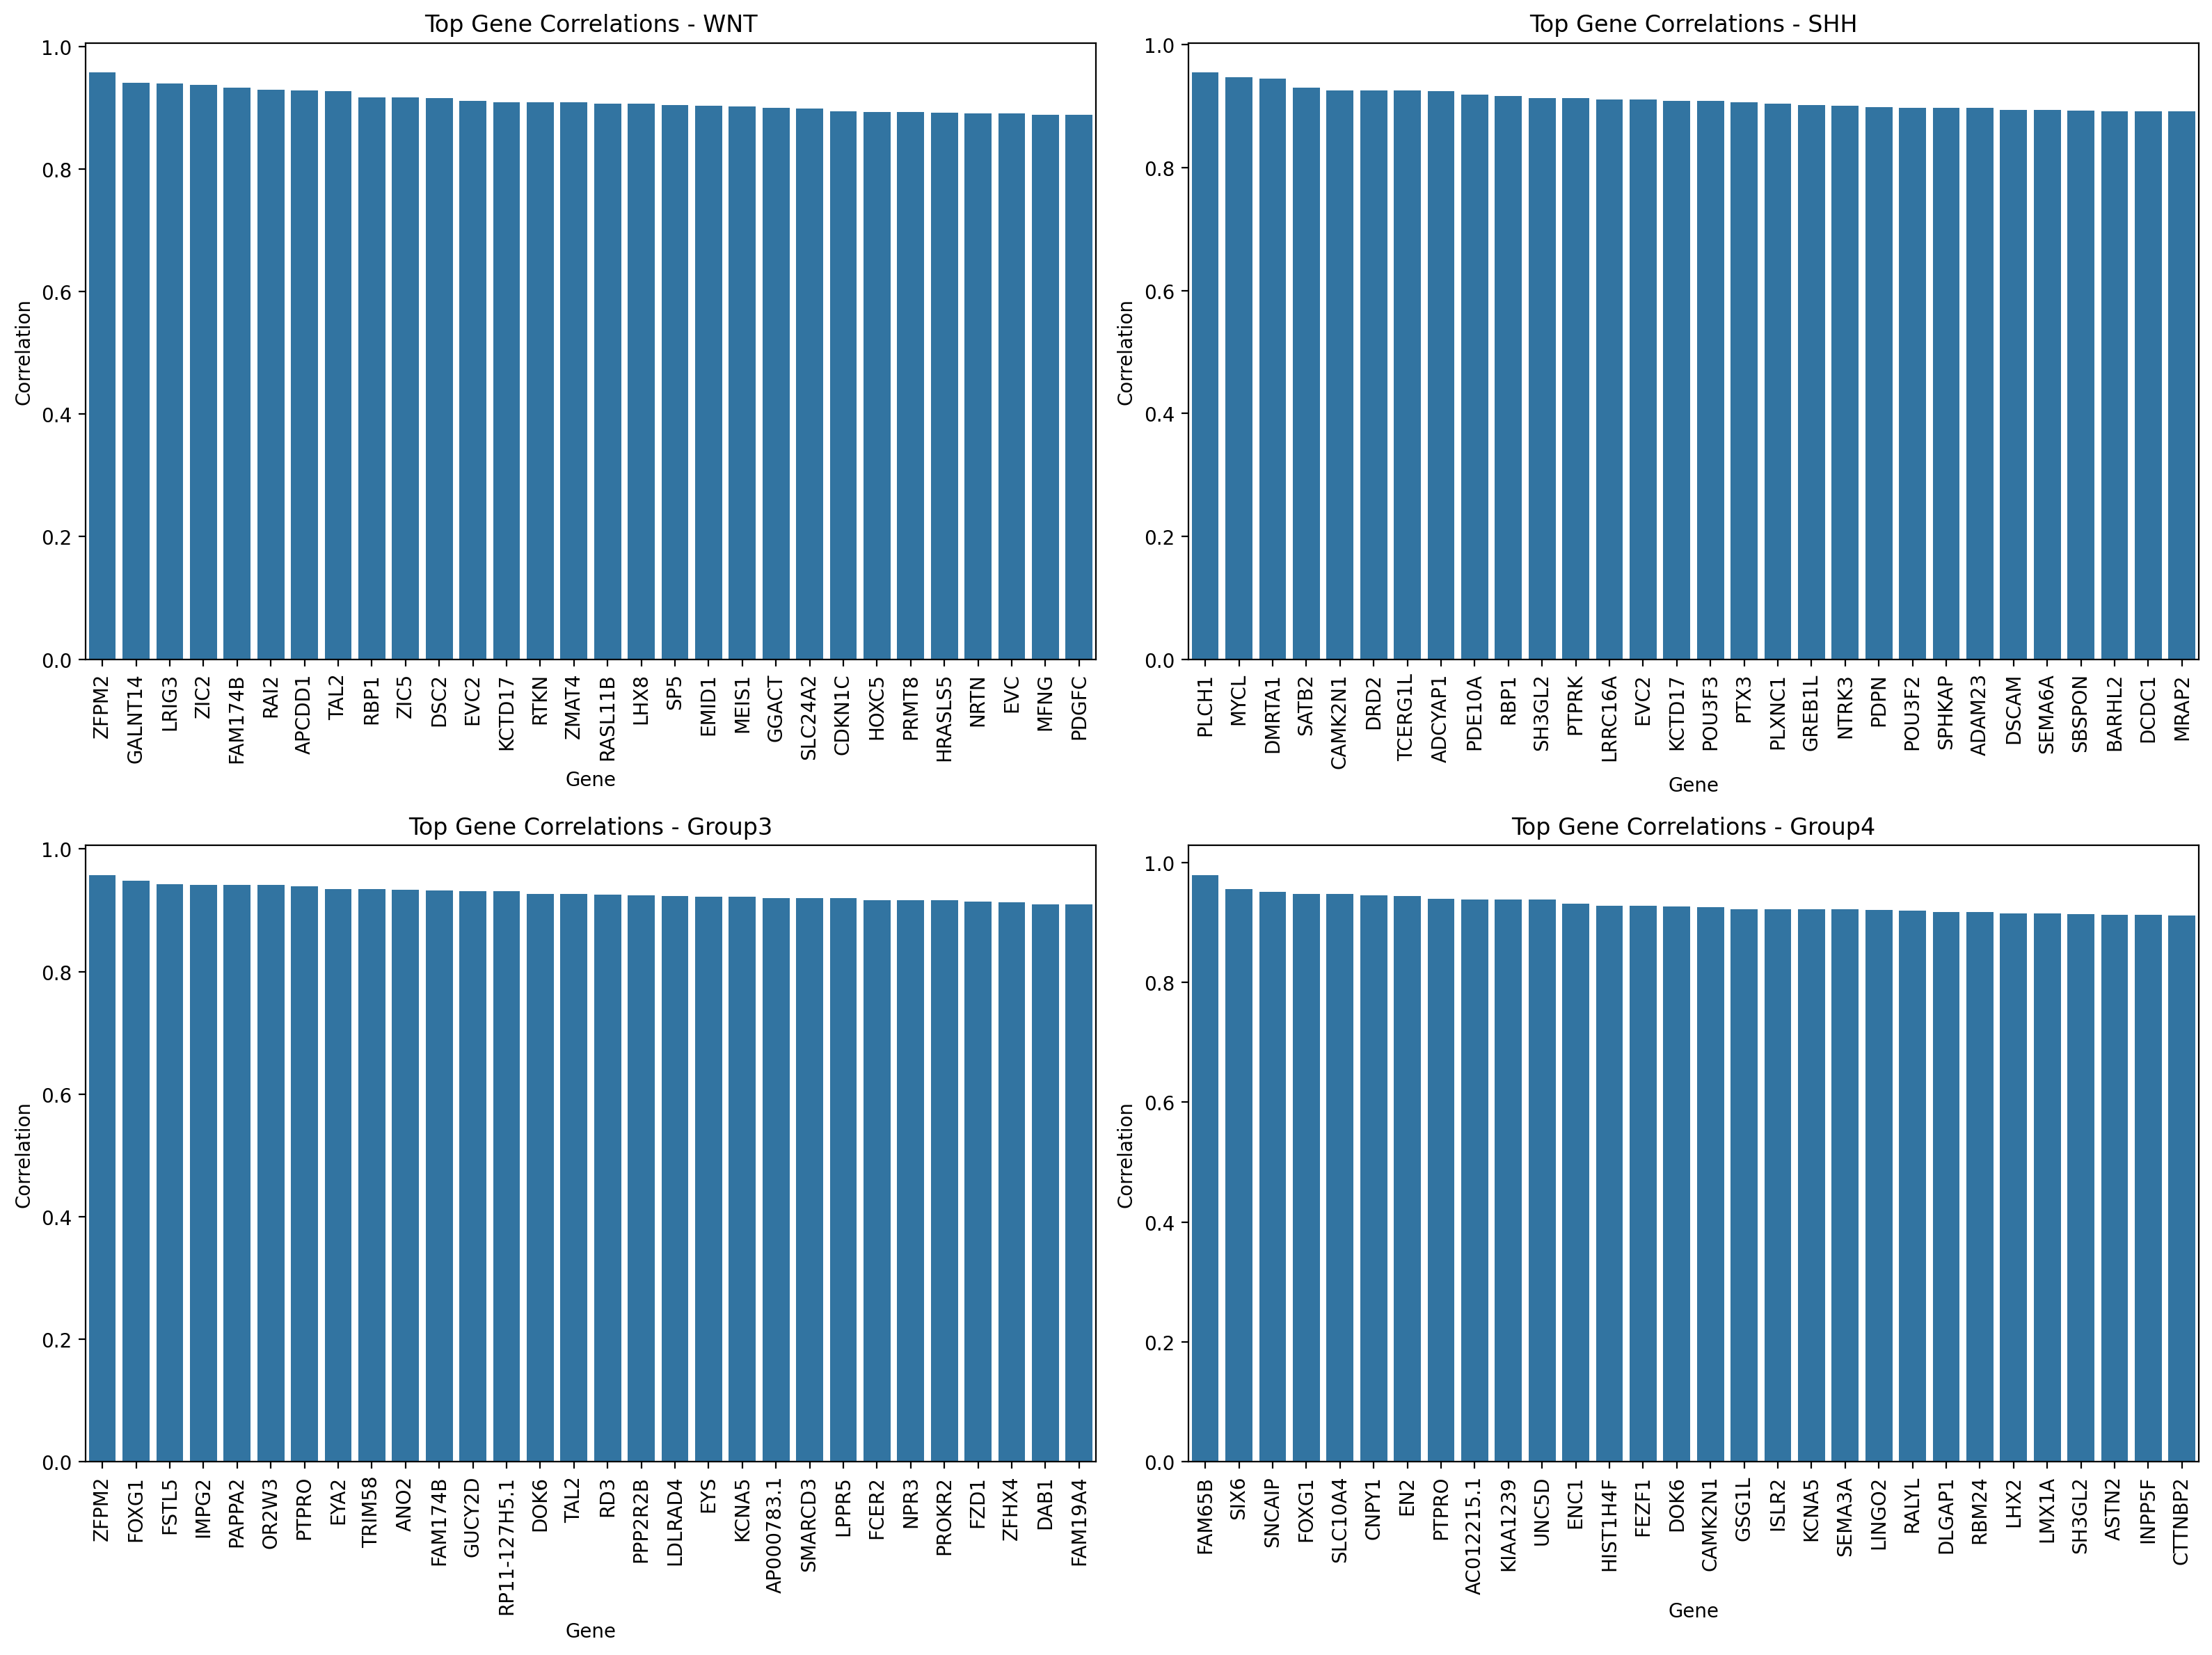

In [77]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 30  # Set the desired number of genes to display per group

top_genes_per_group = plot_df.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

# Creating separate plots for each group
plt.figure(figsize=(16, 12))

group_list = ["WNT", "SHH", "Group3", "Group4"]
for i, group in enumerate(group_list, 1):
    plt.subplot(2, 2, i)
    group_data = top_genes_per_group[top_genes_per_group['Group'] == group]
    if not group_data.empty:
        sns.barplot(data=group_data, x="Gene", y="Correlation", dodge=False)
        plt.xticks(rotation=90)
        plt.title(f"Top Gene Correlations - {group}")

plt.tight_layout()
plt.show()

# Plotting the data from thirs part but just for unique specific genes for each subset

In [78]:
multi_df_plot_unique = multi_df_unique.copy()

In [79]:
# Flattening the multi-level columns
multi_df_plot_unique.columns = ['_'.join(col).strip() for col in multi_df_plot_unique.columns.values]

# Melting the dataframe
melted_df = multi_df_plot_unique.melt(value_vars=["WNT_correlation", "SHH_correlation", "Group3_correlation", "Group4_correlation"],
                          id_vars=["WNT_name", "SHH_name", "Group3_name", "Group4_name"],
                          var_name="Group_Attribute",
                          value_name="Correlation")

# Splitting the 'Group_Attribute' column into 'Group' and 'Attribute'
melted_df[['Group', 'Attribute']] = melted_df['Group_Attribute'].str.split('_', expand=True)

# Preparing the data for seaborn
plot_data = []
for _, row in melted_df.iterrows():
    if row["Group"] == "WNT":
        gene_name = row["WNT_name"]
    elif row["Group"] == "SHH":
        gene_name = row["SHH_name"]
    elif row["Group"] == "Group3":
        gene_name = row["Group3_name"]
    elif row["Group"] == "Group4":
        gene_name = row["Group4_name"]
    
    plot_data.append((gene_name, row["Group"], row["Correlation"]))

plot_df_unique = pd.DataFrame(plot_data, columns=["Gene", "Group", "Correlation"]).dropna()


In [80]:
# Sorting the plot_df by correlation in descending order and selecting the top 30 genes
sort_plot_df_unique = plot_df_unique.sort_values(by="Correlation", ascending=False).head(30)

In [81]:
sort_plot_df_unique

,Gene,Group,Correlation
2472,FAM65B,Group4,0.979231
1199,PLCH1,SHH,0.955385
2172,SIX6,Group4,0.955351
2154,SNCAIP,Group4,0.950769
1067,MYCL,SHH,0.947692
2762,SLC10A4,Group4,0.947692
1329,DMRTA1,SHH,0.945385
2725,CNPY1,Group4,0.945385
2182,EN2,Group4,0.943846
1823,FSTL5,Group3,0.942308


/tmp/ipykernel_26880/3954959289.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = plot_df_unique.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


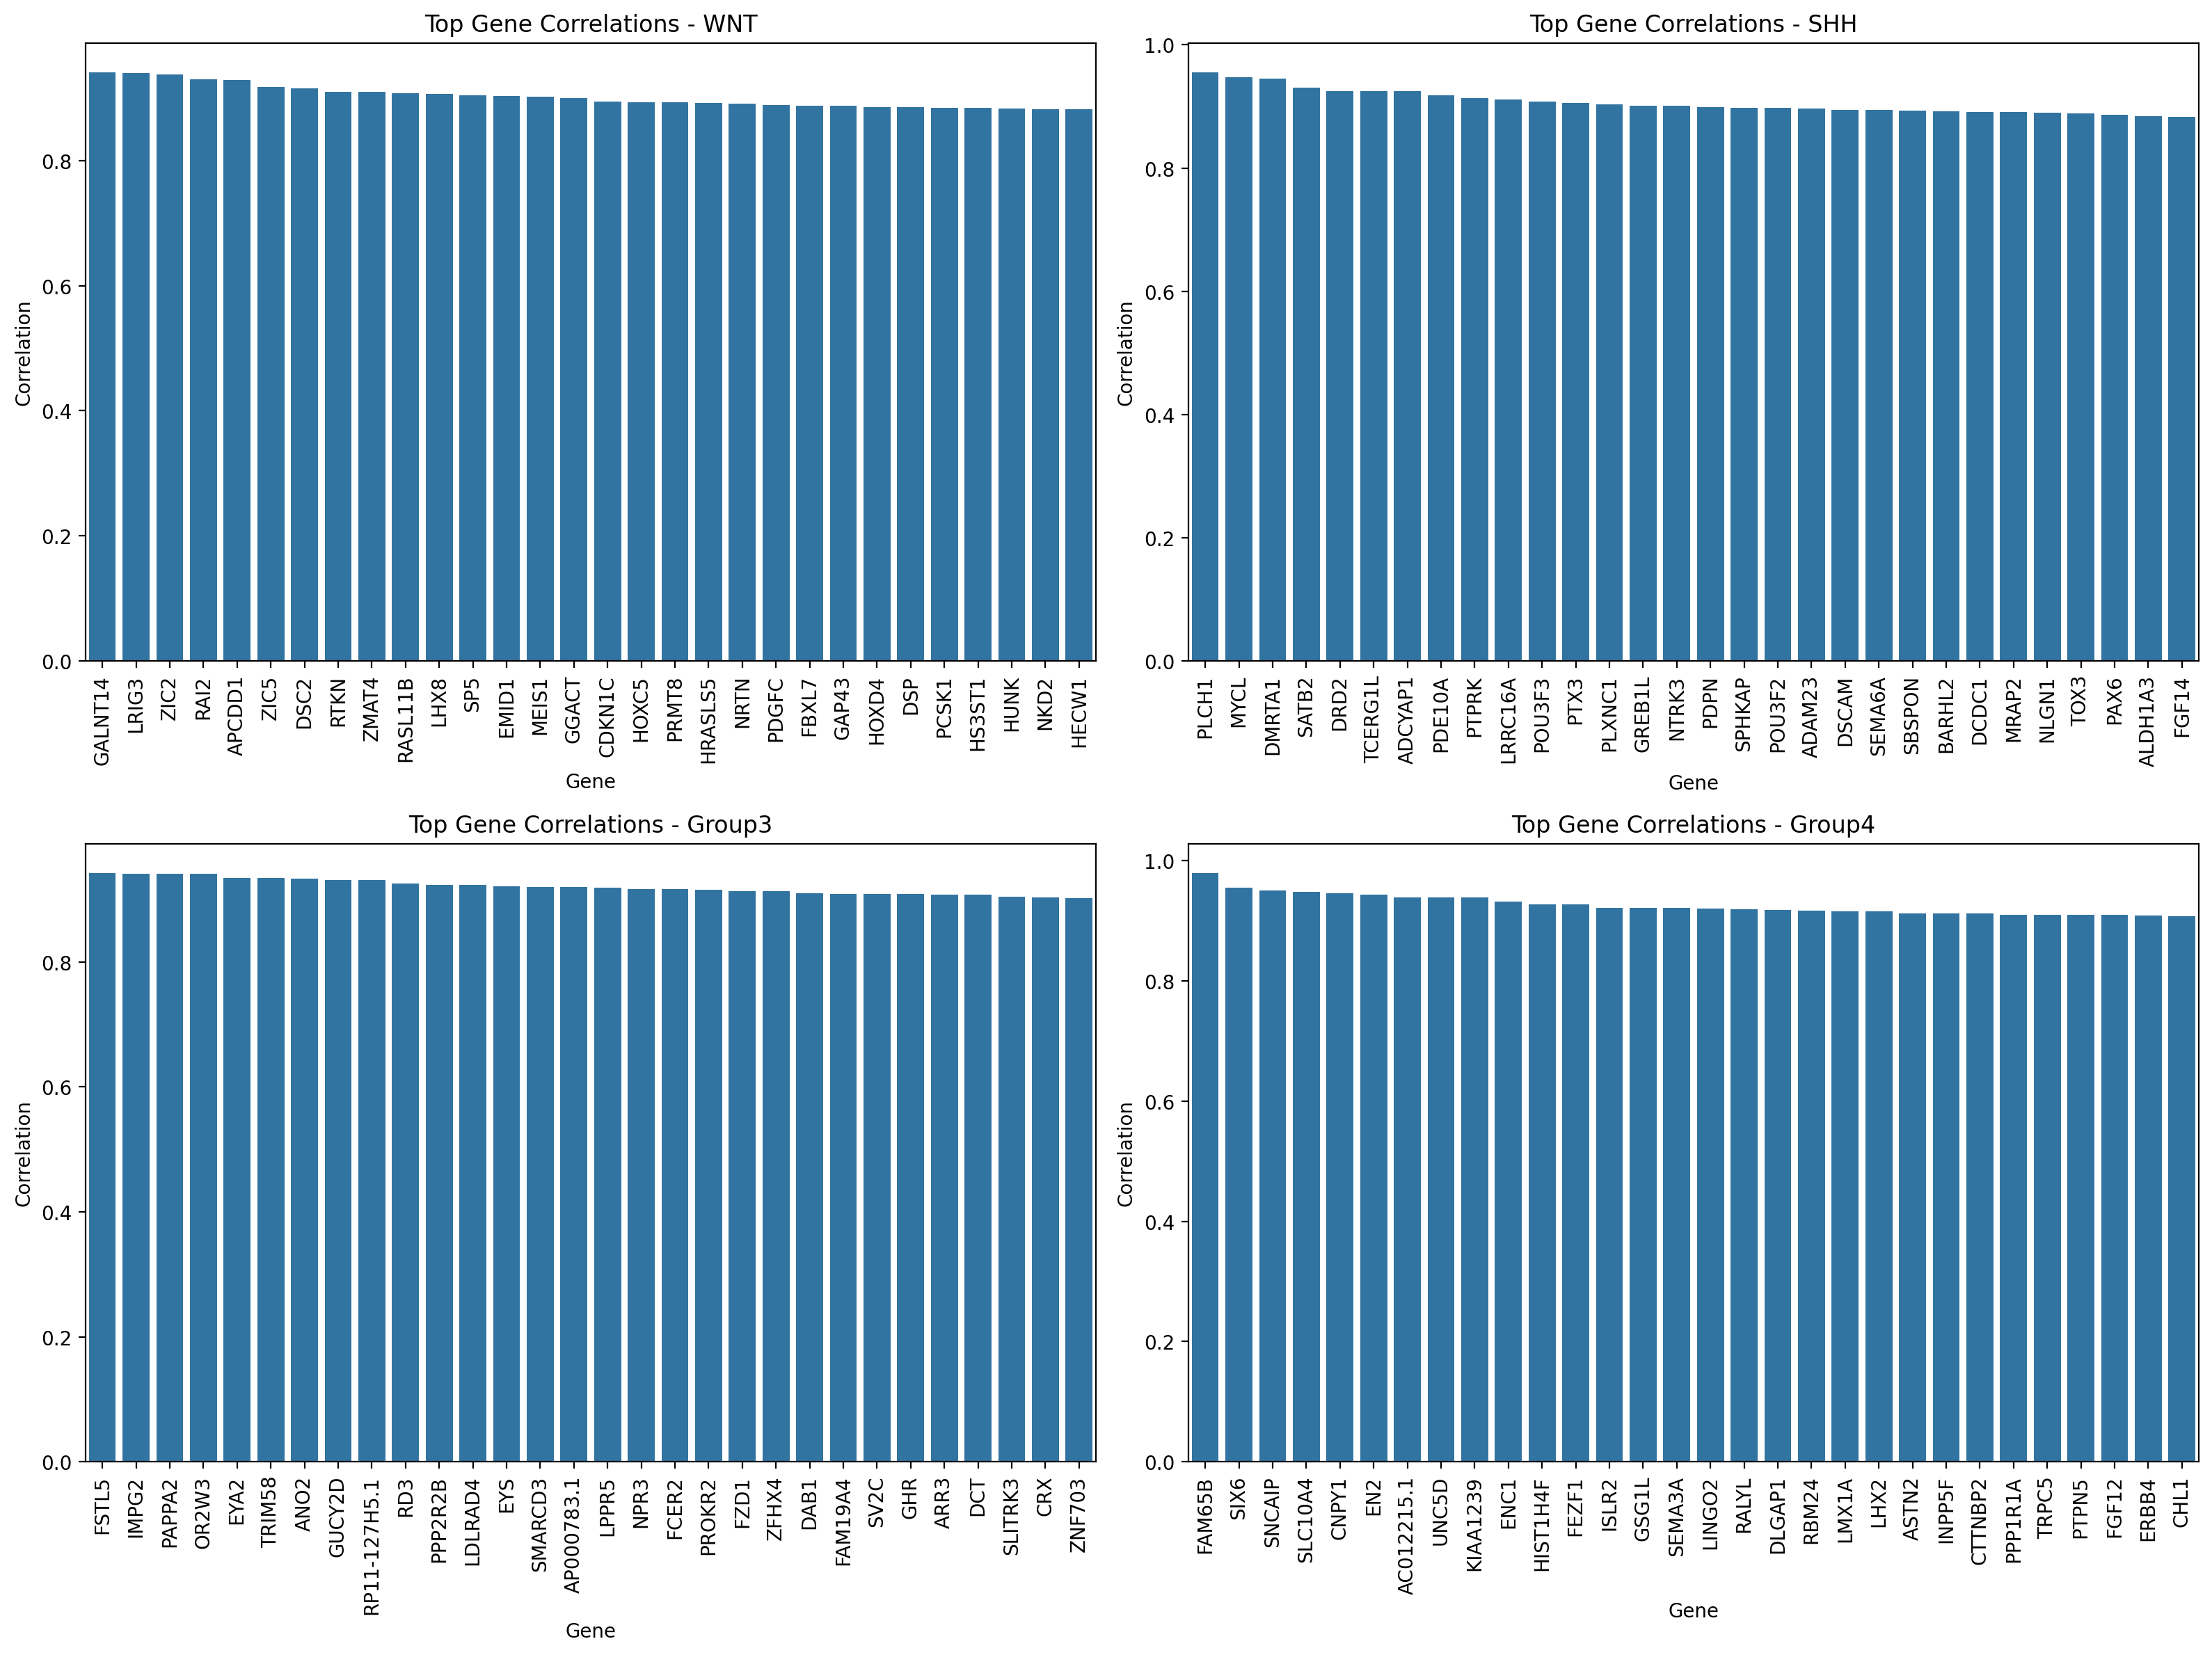

In [82]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group

top_n = 30  # Set the desired number of genes to display per group

top_genes_per_group = plot_df_unique.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

# Creating separate plots for each group
plt.figure(figsize=(16, 12))

group_list = ["WNT", "SHH", "Group3", "Group4"]
for i, group in enumerate(group_list, 1):
    plt.subplot(2, 2, i)
    group_data = top_genes_per_group[top_genes_per_group['Group'] == group]
    if not group_data.empty:
        sns.barplot(data=group_data, x="Gene", y="Correlation", dodge=False)
        plt.xticks(rotation=90)
        plt.title(f"Top Gene Correlations - {group}")

plt.tight_layout()
plt.show()

# Part 4: checking how many genes overlap between Antoine dataset and the table 3 from the publication

In [83]:
sub_data_3

,WNT,SHH,Group 3,Group 4,WNT and SHH,WNT and Group 3,WNT and Group 4,SHH and Group 3,SHH and Group 4,Group 3 and Group 4
0,TMED2,DCDC1,SLC6A9,MCF2L,MYO7A,CALR,SLC24A2,CCNC,UBE2L6,SAYSD1
1,CELF6,C12orf29,LNP1,KIAA1549,NTN1,TMEM64,PCSK1N,NSMCE2,TBC1D2B,MFSD11
2,AC092675.3,SPATA2L,SLC8A1,RNF144A,HSCB,BET1,ABCC8,CDCA7,PSD3,PTPRO
3,CBLN2,CLIP2,SLC35F3,SLC31A1,EPHB4,CRADD,ADCYAP1R1,HDDC2,MARCKS,SLCO5A1
4,SCARF2,WDFY4,TGFB3,SCRN1,RHOBTB3,BSG,CLCN4,FBXO16,PAK3,LYRM2
...,...,...,...,...,...,...,...,...,...,...
708,TMEM51,,,,,,,,,
709,FOXF1,,,,,,,,,
710,PRRX1,,,,,,,,,
711,KLHL42,,,,,,,,,


In [84]:
sub_data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,MAF,PBX1,CRX,SIX2,SMARCA4,TGFBR1,KDM1A,LHX2,ZIC1
1,PAX3,PTCH1,SMAD9,STAT5A,,,KDM7A,,ZIC4
2,TP53,PDLI3,IRX8,CUX2,,,CHD7,,
3,DDX3X,YAP1,RARX2,EN2,,,KDM6A,,
4,TENA,SOX2,GABRA5,OTX2,,,EZH2,,
5,HOXDB13,POU3F3,ATP10A,TBR1,,,KDM5B,,
6,ONECUT2,NHLH1,LHX9,AKT,,,KDM5A,,
7,NKD2,PCNT,LIN28B,SNCAIP,,,KDM3A,,
8,CSNK2B,SMO,MYC,UNC5D,,,KDM4C,,
9,NKD1,GLI2,GBRA5,UNCX,,,ZMYM3,,


## Intersection for WNT group

In [85]:
set(sub_data_3["WNT"]) & set(sub_data["WNT"])

{'EMX2', 'LEF1', 'MAF', 'MSX2', 'NKD1', 'NKD2', 'ONECUT2', 'PAX3', 'RUNX2'}

In [86]:
wnt_list = set()

for column in sub_data.columns:
    if "WNT" in column: 
        wnt_list = wnt_list.union(set(sub_data[column].replace({"":None}).dropna()))   

print(wnt_list)

set(sub_data_3["WNT"]) & set(wnt_list)

{'ONECUT2', 'MAF', 'PAX3', 'NKD2', 'ZIC1', 'CSNK2B', 'NKD1', 'CTNNB1', 'DMRT2', 'ZIC4', 'TP53', 'DDX3X', 'MSX2', 'HOXDB13', 'SMARCA4', 'LET7', 'TENA', 'HOXDB', 'RUNX2', 'LHX2', 'EMX2', 'LEF1'}


{'EMX2', 'LEF1', 'MAF', 'MSX2', 'NKD1', 'NKD2', 'ONECUT2', 'PAX3', 'RUNX2'}

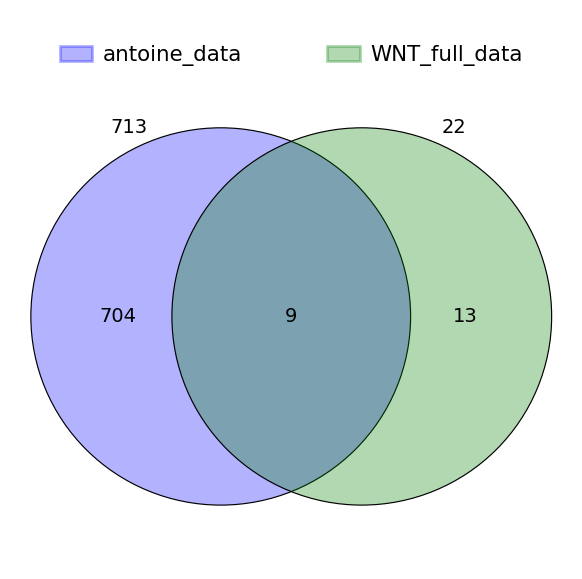

In [97]:
sets_wnt = {
    'WNT_full_data': set(sub_data_3["WNT"]),
    'antoine_data': set(wnt_list),
}

venny4py(sets=sets_wnt, out='../Figures', name="wnt_differences")

## Intersection for SHH group

In [87]:
set(sub_data_3["SHH"]) & set(sub_data["SHH"])

{'',
 'ATOH1',
 'BBX',
 'CEBPA',
 'DMRTA1',
 'GLI2',
 'INSM1',
 'NFATC1',
 'PBX1',
 'PCNT',
 'POU3F3',
 'PTCH1',
 'RARB',
 'SOX13',
 'SOX2',
 'TCF12'}

In [88]:
shh_list = set()

for column in sub_data.columns:
    if "SHH" in column: 
        shh_list = shh_list.union(set(sub_data[column].replace({"":None}).dropna()))   

print(shh_list)

set(sub_data_3["SHH"]) & set(shh_list)

{'PTCH1', 'PBX1', 'NFATC1', 'PDLI3', 'INSM1', 'YAP1', 'TGFBR1', 'ZIC1', 'RARB', 'NCOR2', 'SOX2', 'POU3F3', 'ZIC4', 'BCOR', 'NHLH1', 'SUFU', 'PCNT', 'CEBPA', 'SMO', 'ATOH1', 'GLI2', 'SOX13', 'TCF12', 'DMRTA1', 'LDB1', 'BBX'}


{'ATOH1',
 'BBX',
 'CEBPA',
 'DMRTA1',
 'GLI2',
 'INSM1',
 'NFATC1',
 'PBX1',
 'PCNT',
 'POU3F3',
 'PTCH1',
 'RARB',
 'SOX13',
 'SOX2',
 'TCF12'}

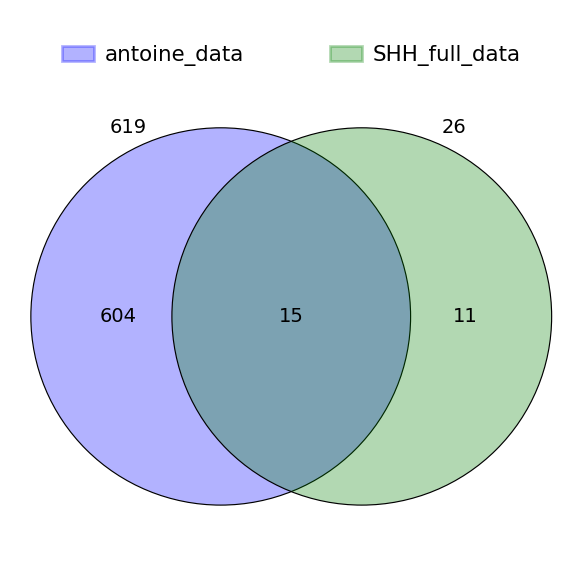

In [98]:
sets_shh = {
    'antoine_data': set(sub_data_3["SHH"]),
    'SHH_full_data': set(shh_list),
}

venny4py(sets=sets_shh, out='../Figures', name="shh_differences")

## Intersection for Group 3 group

In [89]:
set(sub_data_3["Group 3"]) & set(sub_data["Group 3"])

{'', 'CRX', 'GABRA5', 'HLX', 'IMPG2', 'LHX9', 'LIN28B', 'MYC', 'SMAD9'}

In [90]:
group_3_list = set()

for column in sub_data.columns:
    if "Group 3" in column: 
        group_3_list = group_3_list.union(set(sub_data[column].replace({"":None}).dropna()))   

print(group_3_list)

set(sub_data_3["Group 3"]) & set(group_3_list)

{'KDM1A', 'CRX', 'ANPRC', 'CHD7', 'KDM7A', 'IRX8', 'SMAD9', 'IMPG2', 'RARX2', 'TGFBR1', 'KDM5B', 'GABRA5', 'KDM5A', 'ZIC1', 'ATP10A', 'LHX9', 'HLX', 'KDM3A', 'ZIC4', 'ZMYM3', 'KDM6A', 'SMARCA4', 'EZH2', 'LIN28B', 'MYC', 'GBRA5', 'GABRA3', 'KDM4C', 'LHX2'}


{'CRX', 'GABRA5', 'HLX', 'IMPG2', 'LHX9', 'LIN28B', 'MYC', 'SMAD9'}

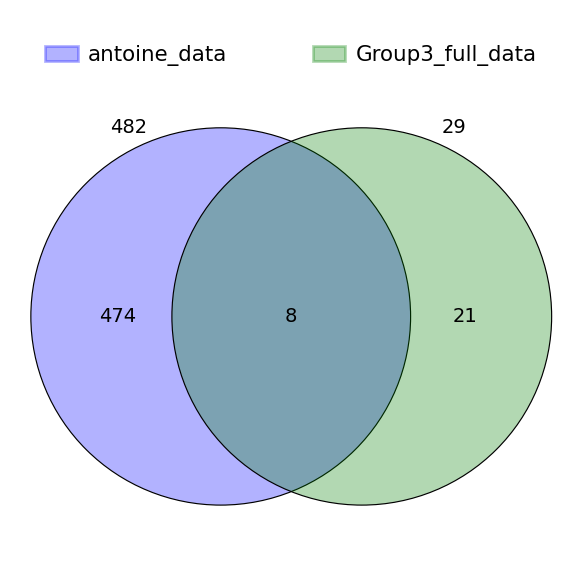

In [99]:
sets_group3 = {
    'antoine_data': set(sub_data_3["Group 3"]),
    'Group3_full_data': set(group_3_list),
}

venny4py(sets=sets_group3, out='../Figures', name="Group3_differences")

## Intersection for Group 4 group

In [91]:
set(sub_data_3["Group 4"]) & set(sub_data["Group 4"])

{'ARID5B',
 'BARHL1',
 'CUX2',
 'EN2',
 'EOMES',
 'LHX1',
 'LHX5',
 'LMX1A',
 'POU2F1',
 'SIX6',
 'SNCAIP',
 'UNC5D',
 'UNCX'}

In [92]:
group_4_list = set()

for column in sub_data.columns:
    if "Group 4" in column: 
        group_4_list = group_4_list.union(set(sub_data[column].replace({"":None}).dropna()))   

print(group_4_list)

set(sub_data_3["Group 4"]) & set(group_4_list)

{'KDM1A', 'SIX2', 'STAT5A', 'KDM7A', 'KDM5B', 'CUX2', 'KDM5A', 'ZIC1', 'EN2', 'OTX2', 'ZMYM3', 'TBR1', 'AKT', 'SNCAIP', 'UNC5D', 'UNCX', 'EOMES/TBR2', 'BARHL1', 'LHX5', 'ZNF513', 'CHD7', 'MLL3', 'LHX1', 'MYCN', 'KDM3A', 'ZIC4', 'HLF', 'EOMES', 'KHDR2', 'KDM6A', 'ERK', 'EZH2', 'POU2F1', 'SIX6', 'ZNF35', 'ARID5B', 'KDM4C', 'LHX2', 'LMX1A'}


{'ARID5B',
 'BARHL1',
 'CUX2',
 'EN2',
 'EOMES',
 'LHX1',
 'LHX2',
 'LHX5',
 'LMX1A',
 'POU2F1',
 'SIX6',
 'SNCAIP',
 'UNC5D',
 'UNCX'}

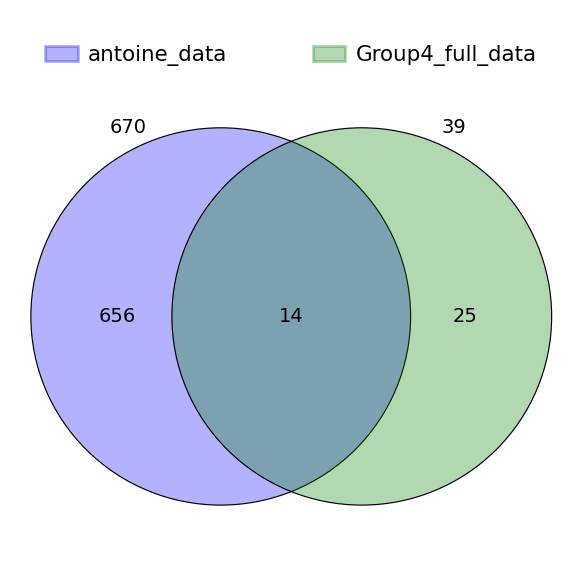

In [101]:
sets_group4 = {
    'antoine_data': set(sub_data_3["Group 4"]),
    'Group4_full_data': set(group_4_list),
}

venny4py(sets=sets_group4, out='../Figures', name="Group4_differences")